IMPORTACION DE LIBRERIAS

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from plotnine import *
from sklearn import decomposition

PROCESAMIENTO DE DATOS

In [154]:
datos_EM = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datos_EM['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datos_EM = pd.concat( [ datos_EM,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datos_EM['Sueldo'] = datos_EM['Sueldo'].str.extract('(\d+)', 
                                                    expand=False).astype(float)
datos_EM['Sueldo'] = datos_EM['Sueldo']*1000

#Cambio nombre de posición
datos_EM = datos_EM.replace(to_replace ='CR.*', value = 'MC', regex = True)
datos_EM = datos_EM.replace(to_replace ='DF.*', value = 'DF', regex = True)
datos_EM = datos_EM.replace(to_replace ='DL.*', value = 'DL', regex = True)
datos_EM = datos_EM.replace(to_replace ='MC.*', value = 'MC', regex = True)
datos_EM = datos_EM.replace(to_replace ='MP.*', value = 'MC', regex = True)
datos_EM = datos_EM.replace(to_replace ='ME.*', value = 'MC', regex = True)

In [155]:
datos_EM['Posición'].value_counts()

MC     1393
DF     1132
POR     361
DL      305
Name: Posición, dtype: int64

In [156]:
#Guardando los nombres para más adelante
names = datos_EM.Nombre.tolist()
pos = datos_EM.Posición.tolist()

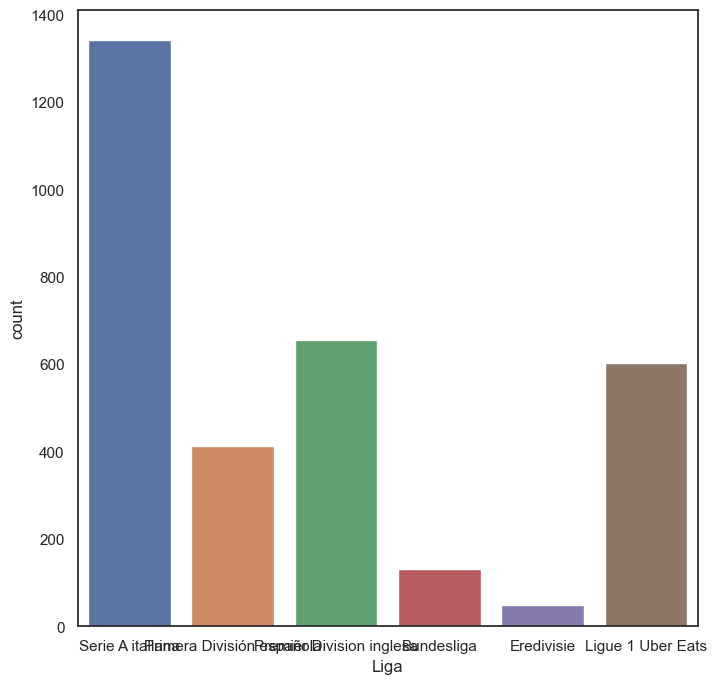

In [157]:
#sns.set_theme(style="white")
sns.set_theme(style="white")
#ax=sns.countplot(x='Posición', hue='División', data=datos_EM)
ax=sns.countplot(x='División', data=datos_EM)
sns.set(rc={'figure.figsize':(8,8)})
plt.xlabel('Liga')
plt.show()

In [159]:
#Eliminación de columnas
datos = datos_EM.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición',
 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [160]:
datos.head()

,Valoracion,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,...,Col,Cen,Cab,Blo,Ant,Sal.1,Aér,Agr,Agi,Ace
0,30,13,11,2,1,6,4,10,8,13,...,3,8,3,3,8,6,3,8,11,13
1,24,7,12,8,3,1,6,6,5,7,...,8,4,5,4,5,3,1,9,11,14
2,18,7,13,7,4,1,2,8,5,4,...,5,4,7,1,8,2,2,15,13,15
3,25,3,8,7,3,1,3,5,5,4,...,12,2,5,2,7,14,3,12,8,7
4,22,2,9,7,1,1,1,5,5,3,...,12,2,12,2,5,8,1,7,9,11


In [161]:
X_EM = np.asanyarray(datos.drop(columns=['Valoracion']))

ESCALAMIENTO DE DATOS Y APLICANDO PCA

In [162]:
#Transformar data a media 0
scaler = preprocessing.StandardScaler()
scaler.fit(X_EM)
scaled_x = scaler.transform(X_EM)

In [163]:
#Aplicando PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(scaled_x)

In [164]:
principalDF = pd.DataFrame(data = principal_components, columns=['PC1','PC2'])
principalDF.head()

,PC1,PC2
0,0.391004,-2.163955
1,2.170069,-2.424179
2,2.734406,-2.936564
3,4.366019,-1.900714
4,3.991592,-3.415338


CONSTRUCCIÓN DEL MODELO

In [165]:
#Modelo EM
EM = GaussianMixture(n_components=4, max_iter=3000)
EM.fit(principalDF)

GaussianMixture(max_iter=3000, n_components=4)

In [166]:
cluster = EM.predict(principalDF)
cluster

array([0, 3, 3, ..., 1, 1, 1], dtype=int64)

In [167]:
silhouette_score(principalDF,cluster)

0.5434617057725996

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

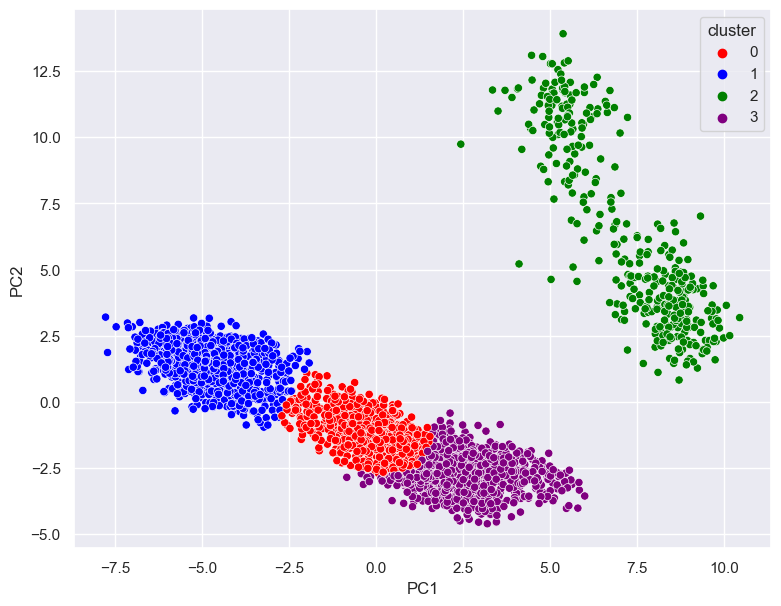

In [169]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=principalDF, 
                x="PC1",
                y="PC2", 
                hue="cluster",
                palette=["red","blue","green", "purple"])

EJEMPLO

In [170]:
principalDF[principalDF['Nombre']=='Simone Zaza']

,PC1,PC2,cluster,Nombre
1264,-5.461212,2.18218,1,Simone Zaza


In [171]:
principalDF[principalDF['Nombre']=='Almamy Camara']

,PC1,PC2,cluster,Nombre
448,2.924303,-1.850048,3,Almamy Camara


In [172]:
principalDF[principalDF['Nombre']=='Claudio Bravo']

,PC1,PC2,cluster,Nombre
1339,3.348954,11.782111,2,Claudio Bravo


In [173]:
principalDF[principalDF['Nombre']=='Arturo Vidal']

,PC1,PC2,cluster,Nombre
1079,-7.784117,3.201292,1,Arturo Vidal
